# 데이터 전처리

In [3]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
심장질환 = pd.read_csv('heart.csv')
심장질환.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

# 상관관계 분석

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


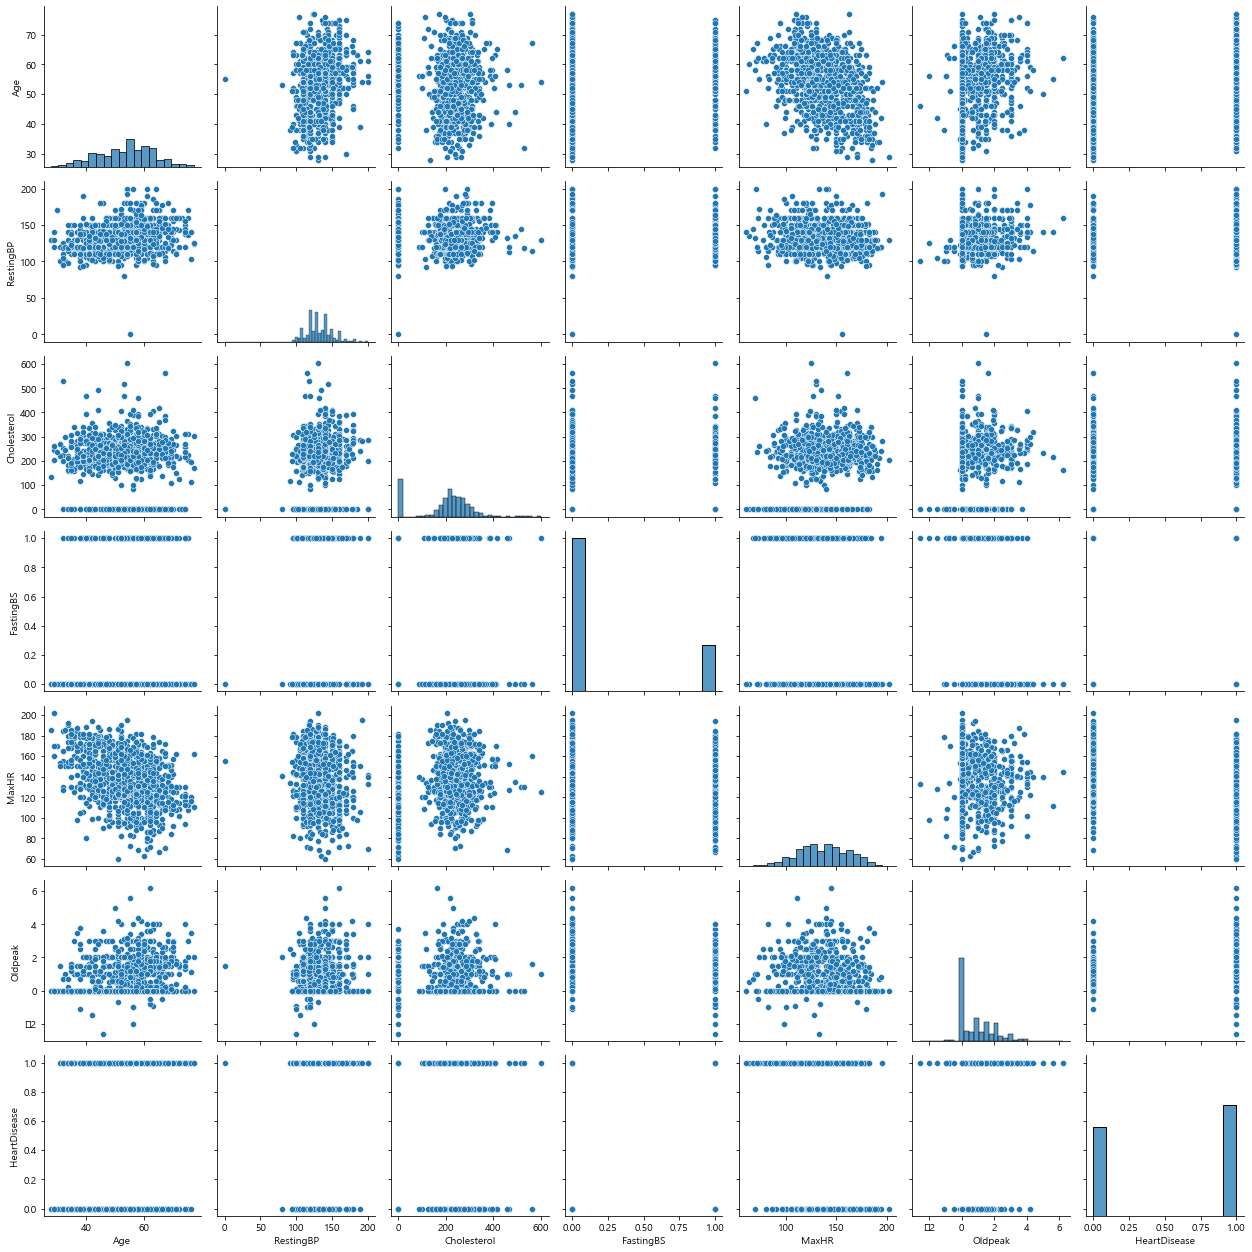

In [5]:
sns.pairplot(심장질환)
plt.tight_layout()
plt.show()

# RandomForest로 학습

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [16]:
심장질환

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [18]:
심장질환 = pd.get_dummies(심장질환, drop_first=True, columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])

#출처: https://leechamin.tistory.com/26 [참신러닝 (Fresh-Learning)]

In [24]:
심장질환.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0      1                  1                  0                 0   
1      0                  0                  1                 0   
2      1                  1                  0                 0   
3      0                  0                  0                 0   
4      1                  0                  1                 0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                  1              0                 0              0   
1                  1              0                 0              1   
2                  0              1                 0              0   
3                  1              0                 1              1   
4                  1              0                 0              0   

   ST_Slope_Up  
0            1  
1            0  
2            1  
3            0  
4            1

범주형변수는 모델 학습에 사용하기 위해 수치형 또는 이진 변수로 변환해야 합니다.

In [20]:
data_y=심장질환['HeartDisease']
X_features=심장질환.drop(['HeartDisease'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X_features,data_y,test_size=0.3,random_state=777)
model_randomForest = RandomForestClassifier()
model_randomForest.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
model_randomForest.score(X_test,y_test)

0.8369565217391305

In [22]:
model_randomForest.feature_importances_

array([0.07268873, 0.06725386, 0.11191523, 0.02376464, 0.10307736,
       0.10223667, 0.0268803 , 0.04033253, 0.02909396, 0.01057343,
       0.01814647, 0.01042639, 0.08676143, 0.12362454, 0.17322446])

(-1.0, 15.0)

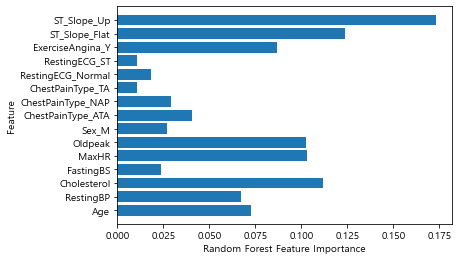

In [23]:
n_features = X_train.shape[1]
plt.barh(np.arange(n_features), model_randomForest.feature_importances_, align="center")
plt.yticks(np.arange(n_features), X_test.columns)
plt.xlabel("Random Forest Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)